# Import Library and Loaing the Data

In [2]:
import numpy as np
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from hypothesis_test import *
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"]=(15, 6)
font={'family': 'fantasy', 'weight': 'bold', 'size': 12}
mpl.rc('font', **font)
np.random.seed(42)


import warnings
warnings.filterwarnings('ignore')

Data Source: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

In [4]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Analysis

In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
np.round(df.describe(), 3)

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


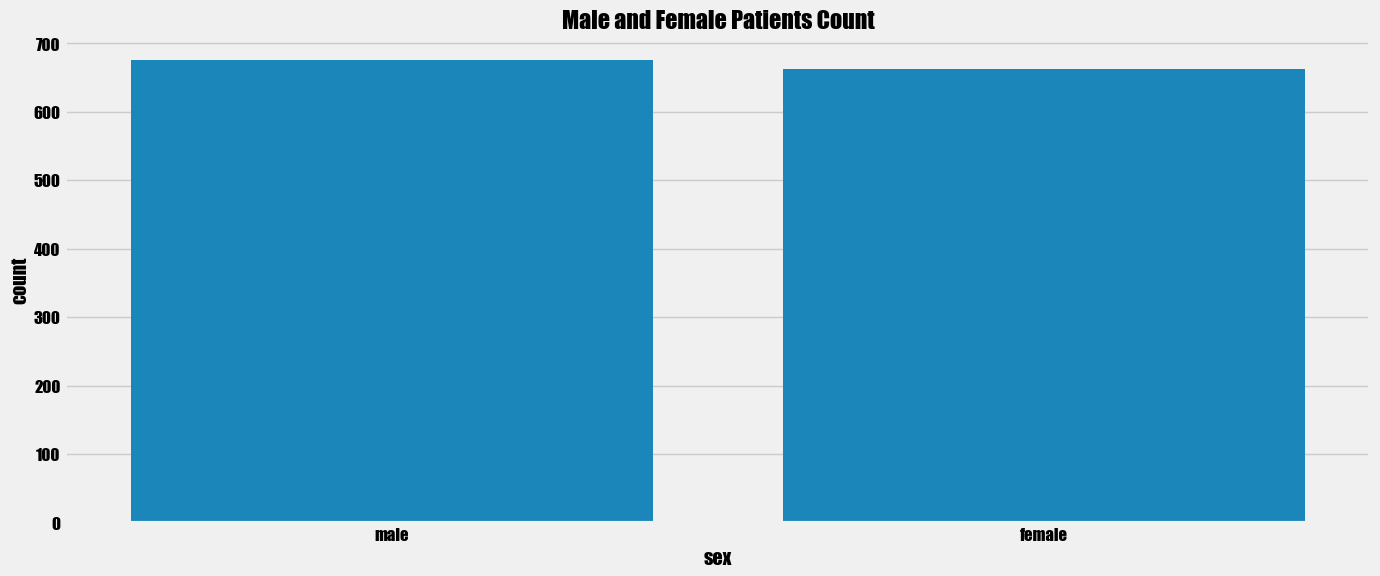

In [9]:
sns.countplot(x='sex', data=df, order=df['sex'].value_counts().index)
plt.title('Male and Female Patients Count')
plt.show()

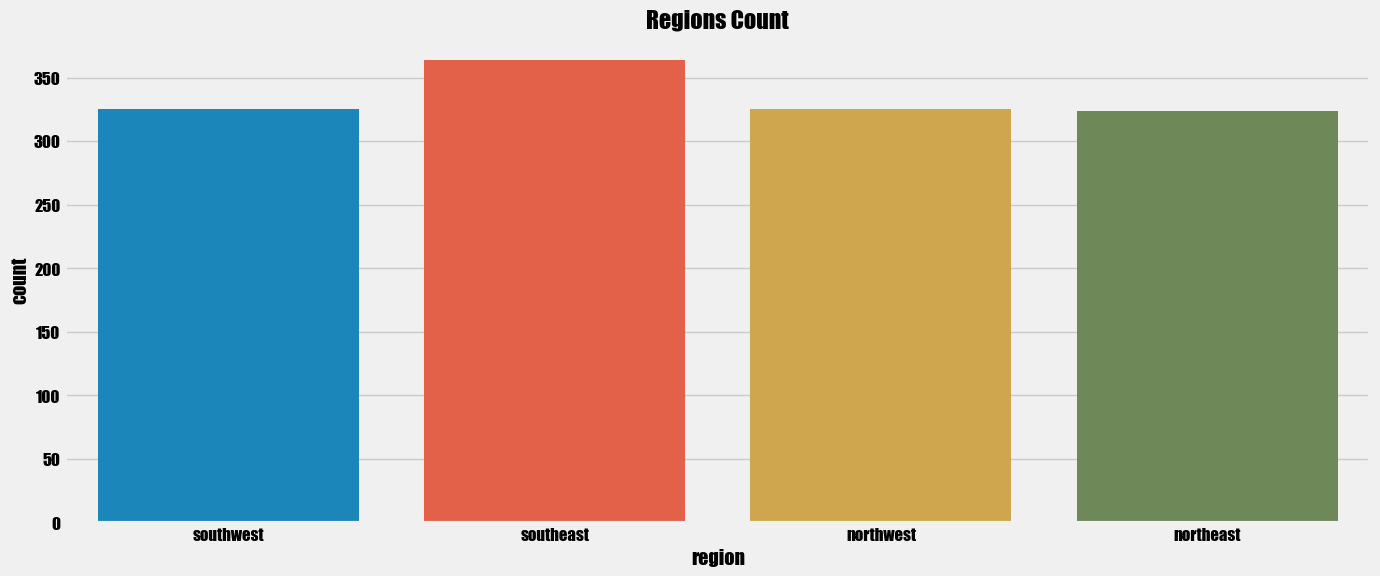

In [10]:
sns.countplot(x='region', data=df, hue='region')
plt.title('Regions Count')
plt.show()

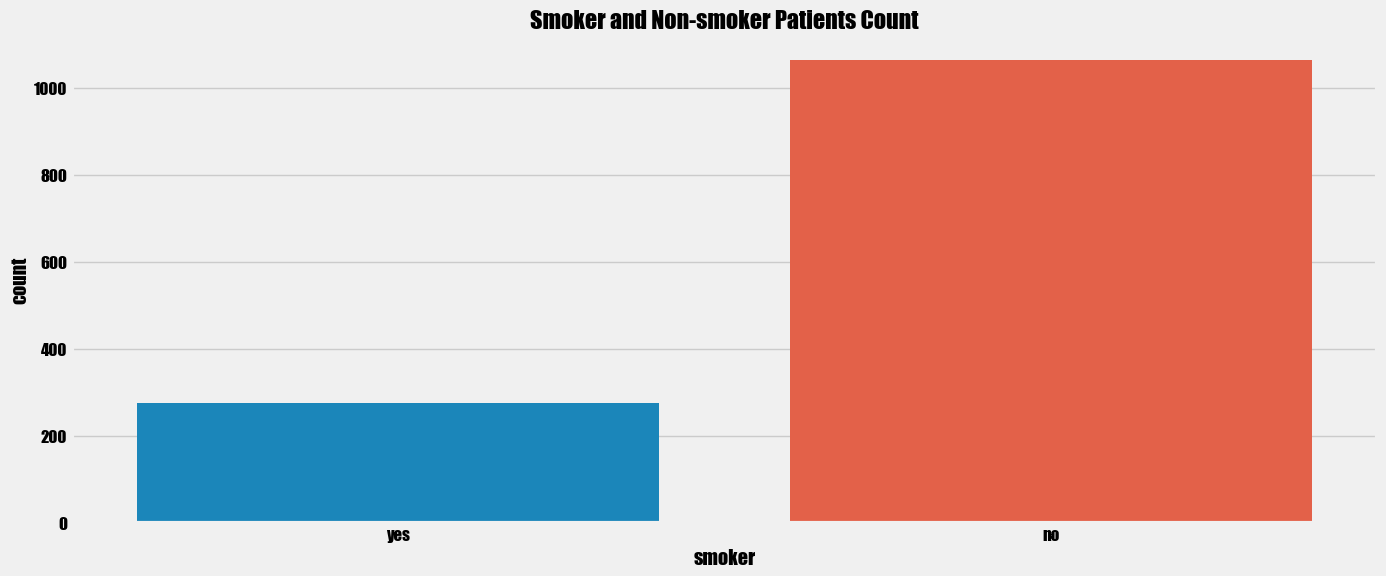

In [11]:
sns.countplot(x='smoker', data=df, hue='smoker')
plt.title('Smoker and Non-smoker Patients Count')
plt.show()

In [12]:
df[['sex', 'smoker', 'region']].apply(lambda x: x.value_counts(normalize=True))

,sex,smoker,region
female,0.494768,NaN,NaN
male,0.505232,NaN,NaN
no,NaN,0.795217,NaN
northeast,NaN,NaN,0.242152
northwest,NaN,NaN,0.242900
southeast,NaN,NaN,0.272048
southwest,NaN,NaN,0.242900
yes,NaN,0.204783,NaN


**There are almost balanced data for gender and region. But maximum patients are non-smoker (79%)**

In [14]:
total_charge=df['charges'].sum()
print(f'Total Cost is: {np.round(total_charge/1e06, 2)}M $')

Total Cost is: 17.76M $


In [15]:
charges_proportion=df.groupby(['sex', 'smoker', 'region'])['charges'].agg([np.mean, np.sum])
charges_proportion.columns=['mean_charges', 'total_charges']
charges_proportion['% of charges']=(charges_proportion['total_charges']/total_charge)*100
np.round(charges_proportion.sort_values('% of charges', ascending=False, ), 2)

mean_charges  total_charges  % of charges
sex    smoker region                                              
male   yes    southeast      36029.84     1981641.17         11.16
female no     northeast       9640.43     1272536.36          7.17
male   yes    southwest      32598.86     1206157.93          6.79
female yes    southeast      33034.82     1189253.55          6.70
       no     northwest       8787.00     1186244.82          6.68
male   yes    northeast      30926.25     1175197.60          6.62
female no     southeast       8440.21     1173188.57          6.61
              southwest       8234.09     1161006.87          6.54
male   no     northwest       8320.69     1098330.99          6.19
              northeast       8664.04     1083005.28          6.10
              southeast       7609.00     1019606.48          5.74
              southwest       7778.91      980142.10          5.52
       yes    northwest      30713.18      890682.26          5.02
female yes    northwest      29670.82      860453.92          4.85
              northeast      28032.05      812929.35          4.58
              southwest      31687.99      665447.76          3.75

**Male smokers from the Southeast region had to pay significantly higher fees than the others.**

In [17]:
total_bmi=df['bmi'].sum()
total_bmi

41027.625

In [18]:
bmi_proportion=df.groupby(['sex', 'smoker'])['bmi'].agg([np.mean, np.sum])
bmi_proportion.columns=['mean_bmi', 'total_bmi']
bmi_proportion['% of bmi']=(bmi_proportion['total_bmi']/total_bmi)*100
np.round(bmi_proportion.sort_values('% of bmi', ascending=False, ), 2)

mean_bmi  total_bmi  % of bmi
sex    smoker                               
female no         30.54   16705.12     40.72
male   no         30.77   15908.39     38.77
       yes        31.50    5009.16     12.21
female yes        29.61    3404.95      8.30

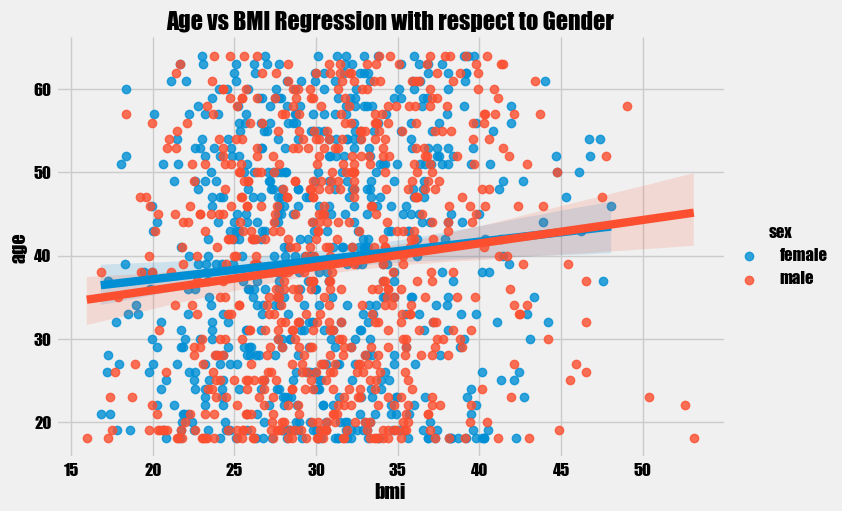

In [19]:
sns.lmplot(x='bmi', y='age', hue='sex', data=df, aspect=1.5)
plt.title('Age vs BMI Regression with respect to Gender')
plt.show()

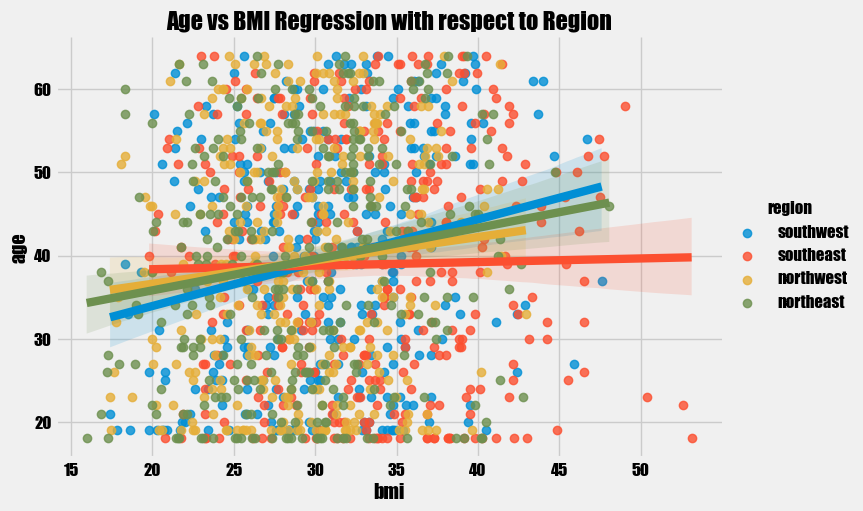

In [20]:
sns.lmplot(x='bmi', y='age', hue='region', data=df, aspect=1.5)
plt.title('Age vs BMI Regression with respect to Region')
plt.show()

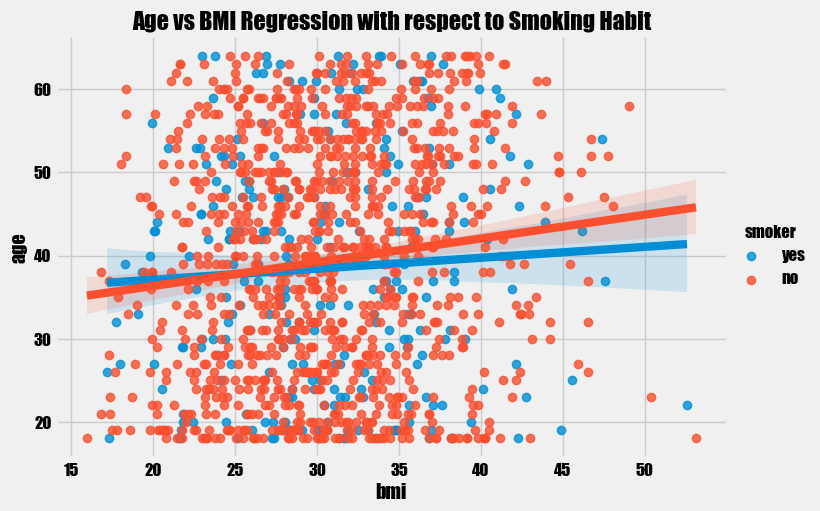

In [21]:
sns.lmplot(x='bmi', y='age', hue='smoker', data=df, aspect=1.5)
plt.title('Age vs BMI Regression with respect to Smoking Habit')
plt.show()

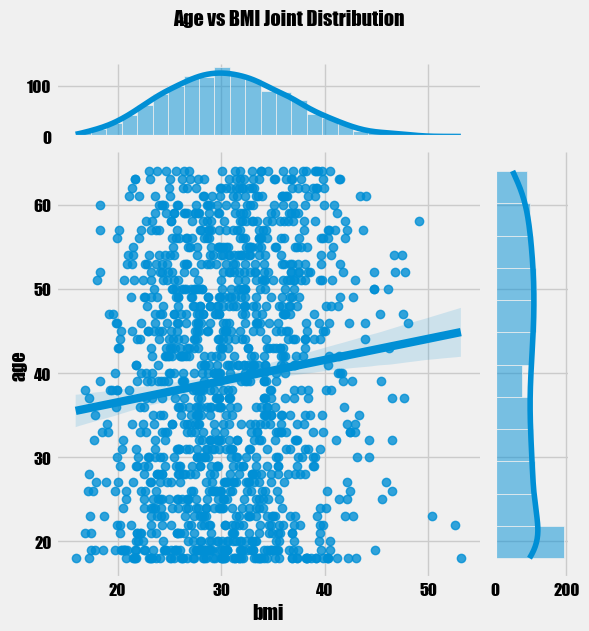

In [22]:
g=sns.jointplot(x='bmi', y='age', data=df, marginal_ticks=True, kind='reg')
g.fig.suptitle('Age vs BMI Joint Distribution', y=1.05)
plt.show()

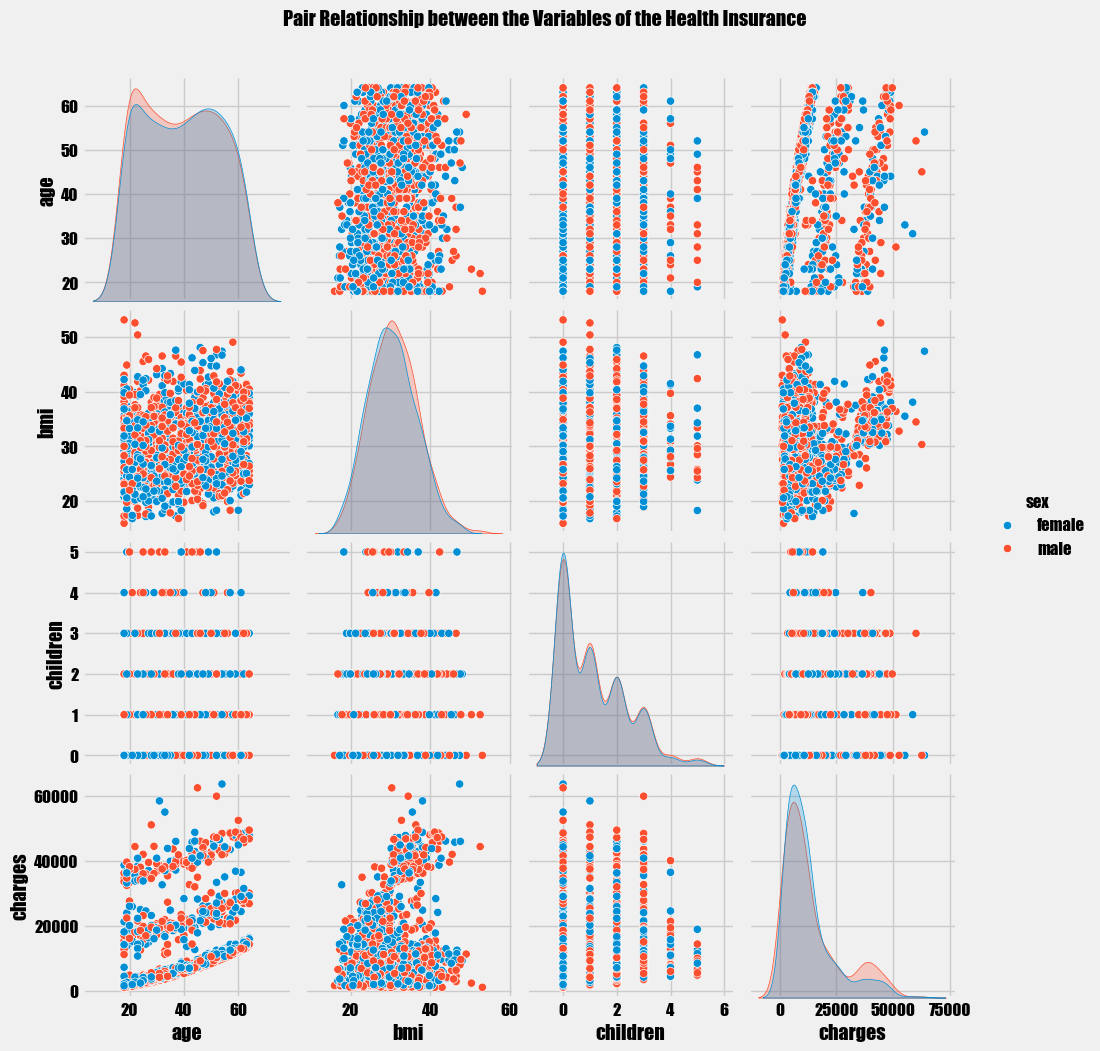

In [23]:
g=sns.pairplot(data=df, hue='sex')
g.fig.suptitle("Pair Relationship between the Variables of the Health Insurance", y=1.05)
plt.show()

# Hypothesis Testing

Two types of hypothesis:

1.   Null Hypothesis, $H_{O}$: It is about assuming that there is no anomaly pattern or believing based on that assumption. 

2.   Alternate hypothesis $H_{A}$: It implies that observed is the result of an actual effect, challenging the null hypothesis.

Two types of error:

1.   Type I Error: In this error, we reject the null hypothesis when it is true.
2.   Type II Error: In this error, we accept the null hypothesis when it is false.

## Chi-square Test

* It compares two categorical variables from a single population.
* It determines significant association between them.

<font color='blue'>***Test-1***</font>

*   $H_{O}$: There is no relation among the genders for being a smoker. (They are independent)
*   $H_{A}$: There is a significant difference between the genders for being a smoker.

In [29]:
chi2_test(df['sex'], df['smoker'], 'Sex and Smoking')

Cross Table:

smoker   no  yes
sex             
female  547  115
male    517  159

Chi Square test is stating..................


Chi Square Statistics: 7.39, P-value: 0.01, Degree of Freedom: 1

Observed Values:
[[547 115]
 [517 159]]

Reject NULL HYPOTHESIS, the variables Sex and Smoking are not independent of each other

Expected Values: 
[[526. 136.]
 [538. 138.]]

Stopped the test


**We have to reject our null hypothesis according to the T-test. There is a significant difference between the genders for being a smoker**

**Now, we have to check if there is any type I error.**

In [31]:
female_smoker_ratio=df[(df['sex'] == 'female') & (df['smoker']  == 'yes')].size/df.size
male_smoker_ratio=df[(df['sex'] == 'male') & (df['smoker']  == 'yes')].size/df.size

print(f'The ratio of female smoker is {np.round(female_smoker_ratio, 2)} and male smoker is {np.round(male_smoker_ratio, 2)}\n')

if female_smoker_ratio > male_smoker_ratio:
    print(f'Ratio of female smoker is {np.round((female_smoker_ratio-male_smoker_ratio) * 100, 2)}% greater than the male smokers\n')
elif female_smoker_ratio < male_smoker_ratio:
    print(f'Ratio of male smoker is {np.round((male_smoker_ratio-female_smoker_ratio) * 100)}% greater than the male smokers\n')
else:
    print(f'Ratio of male and female smokers are same\n')

The ratio of female smoker is 0.09 and male smoker is 0.12

Ratio of male smoker is 3.0% greater than the male smokers



**We can see that 3% difference is significant. So there is no type I error**

<font color='blue'>***Test-2***</font>

*   $H_{O}$: There is no effect of specific regions from which the patient came for (They are independent)
*   $H_{A}$: There is a significant effect between the regions and the patients

In [34]:
chi2_test(df['sex'], df['region'], 'Sex and Region', )

Cross Table:

region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        161        189        163

Chi Square test is stating..................


Chi Square Statistics: 0.44, P-value: 0.93, Degree of Freedom: 3

Observed Values:
[[161 164 175 162]
 [163 161 189 163]]

ACCEPT NULL HYPOTHESIS, the variables Sex and Region are independent of each other

Expected Values: 
[[160. 161. 180. 161.]
 [164. 164. 184. 164.]]

Stopped the test


**We can keep our null hypothesis according to the T-test. There is no difference between the patients gender on specific regions.**

**Now, we have to check if there is any type II error.**

In [36]:
def test_type_II_error(region):
    ratio_female=df[(df['sex'] == 'female') & (df['region']  == region)].size/df.size
    ratio_male=df[(df['sex'] == 'male') & (df['region']  == region)].size/df.size
    
    print(f'For region {region}: \n')
    print(f'The ratio of female patient is: {np.round(ratio_female, 2)} and the male patient is {np.round(ratio_male, 2)}\n')

test_type_II_error(region='northeast')
test_type_II_error(region='northwest')
test_type_II_error(region='southeast')
test_type_II_error(region='southwest')

For region northeast: 

The ratio of female patient is: 0.12 and the male patient is 0.12

For region northwest: 

The ratio of female patient is: 0.12 and the male patient is 0.12

For region southeast: 

The ratio of female patient is: 0.13 and the male patient is 0.14

For region southwest: 

The ratio of female patient is: 0.12 and the male patient is 0.12



**The ratios are not significantly different from each other because they are almost same. So there is no type II error**

<font color='blue'>***Test-3***</font>

*   $H_{O}$: There is no effect of specific regions for being a smoker (They are independent)
*   $H_{A}$: There is a significant effect between the regions for being a smoker.

In [39]:
chi2_test(df['smoker'], df['region'], 'Smoking and Region')

Cross Table:

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58

Chi Square test is stating..................


Chi Square Statistics: 7.34, P-value: 0.06, Degree of Freedom: 3

Observed Values:
[[257 267 273 267]
 [ 67  58  91  58]]

ACCEPT NULL HYPOTHESIS, the variables Smoking and Region are independent of each other

Expected Values: 
[[258. 258. 289. 258.]
 [ 66.  67.  75.  67.]]

Stopped the test


**We can keep our null hypothesis according to the T-test. There is no effect of specific regions for being a smoker.**

**Now, we have to check if there is any type II error.**

In [41]:
def test_type_II_error(region):
    ratio_nonsmoker=df[(df['smoker'] == 'no') & (df['region']  == region)].size/df.size
    ratio_smoker=df[(df['smoker'] == 'yes') & (df['region']  == region)].size/df.size
    
    print(f'For region {region}: \n')
    print(f'The ratio of non-smoker patient is: {np.round(ratio_nonsmoker, 2)} and the smoker patient is {np.round(ratio_smoker, 2)}\n')

test_type_II_error(region='northeast')
test_type_II_error(region='northwest')
test_type_II_error(region='southeast')
test_type_II_error(region='southwest')

For region northeast: 

The ratio of non-smoker patient is: 0.19 and the smoker patient is 0.05

For region northwest: 

The ratio of non-smoker patient is: 0.2 and the smoker patient is 0.04

For region southeast: 

The ratio of non-smoker patient is: 0.2 and the smoker patient is 0.07

For region southwest: 

The ratio of non-smoker patient is: 0.2 and the smoker patient is 0.04



**Ratios are almost same so there is no type II error. (There are 79% patients are non-smoker)**

## T Test

* It is an inferential statistic.
* It determines if there is a significant difference between the means of two groups that may be related in certain features.

Three types:

1. One sampled t-test
2. Two sampled t-test
3. Paired t-test

### One Sampled t-test

The test will tell us whether the means of the sample and the population are different or not.

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<font color='blue'>***Test-4***</font>

*   $H_{O}$: There is no effect of female patients BMI on the entire patients BMI (They are independent).
*   $H_{A}$: There is a significant effect of female patients BMI on the entire patients BMI.

In [49]:
one_sample_ttest(dataset=df, sample_col='sex', group='female', target_col='bmi', significance_level=0.05, categorical=True)

sex(female) Avg bmi: 30.38

Populations Avg bmi: 30.66

Difference of bmi: 0.28

T Statistics: -1.22, P-value: 0.22

ACCEPT NULL HYPOTHESIS, the samples are independent to each other


**We can keep our null hypothesis according to the T-test. There is no significant difference of female patients BMI on the entire patients BMI.**

**The actual difference is 0.28 which is not as much as significant. So there is no type II error.**

<font color='blue'>***Test-5***</font>

*   $H_{O}$: There is no effect of male patients BMI on the entire patients BMI (They are independent).
*   $H_{A}$: There is a significant effect of male patients BMI on the entire patients BMI.

In [52]:
one_sample_ttest(dataset=df, sample_col='sex', group='male', target_col='bmi', significance_level=0.05, categorical=True)

sex(male) Avg bmi: 30.94

Populations Avg bmi: 30.66

Difference of bmi: 0.28

T Statistics: 1.18, P-value: 0.24

ACCEPT NULL HYPOTHESIS, the samples are independent to each other


**We can keep our null hypothesis according to the T-test. There is no significant difference of male patients BMI on the entire patients BMI.**

**The actual difference is also 0.28 which is not as much as significant. So there is no type II error.**

<font color='blue'>***Test-6***</font>

*   $H_{O}$: There is no effect of being smoker on the entire patients BMI (They are independent).
*   $H_{A}$: There is a significant effect of being smoker on the entire patients BMI.

In [55]:
one_sample_ttest(dataset=df, sample_col='smoker', group='yes', target_col='bmi', significance_level=0.05, categorical=True)

smoker(yes) Avg bmi: 30.71

Populations Avg bmi: 30.66

Difference of bmi: 0.05

T Statistics: 0.12, P-value: 0.91

ACCEPT NULL HYPOTHESIS, the samples are independent to each other


**We can keep our null hypothesis according to the T-test. There is no significant difference of smokers BMI on the entire patients BMI.**

**The actual difference is 0.05 which is not as much as significant. So there is no type II error.**

<font color='blue'>***Test-7***</font>

*   $H_{O}$: There is no effect of not being smoker on the entire patients BMI (They are independent).
*   $H_{A}$: There is a significant effect of not being smoker on the entire patients BMI.

In [58]:
one_sample_ttest(dataset=df, sample_col='smoker', group='no', target_col='bmi', significance_level=0.05, categorical=True)

smoker(no) Avg bmi: 30.65

Populations Avg bmi: 30.66

Difference of bmi: 0.01

T Statistics: -0.06, P-value: 0.95

ACCEPT NULL HYPOTHESIS, the samples are independent to each other


**We can keep our null hypothesis according to the T-test. There is no significant difference of non-smokers BMI on the entire patients BMI.**

**The actual difference is 0.01 which is not as much as significant. So there is no type II error.**

<font color='blue'>***Test-8***</font>

*   $H_{O}$: There is no effect of any regions on the entire patients BMI (They are independent).
*   $H_{A}$: There is a significant effect of any regions on the entire patients BMI.

***(There are 4 regions)***

In [61]:
print('For Southwest region:\n')
one_sample_ttest(dataset=df, sample_col='region', group='southwest', target_col='bmi', significance_level=0.05, categorical=True)
print('\n\n\n')

print('\nFor Southeast region:\n')
one_sample_ttest(dataset=df, sample_col='region', group='southeast', target_col='bmi', significance_level=0.05, categorical=True)
print('\n\n\n')

print('\nFor Northwest region:\n')
one_sample_ttest(dataset=df, sample_col='region', group='northwest', target_col='bmi', significance_level=0.05, categorical=True)
print('\n\n\n')

print('\nFor Northeast region:\n')
one_sample_ttest(dataset=df, sample_col='region', group='northeast', target_col='bmi', significance_level=0.05, categorical=True)

For Southwest region:

region(southwest) Avg bmi: 30.6

Populations Avg bmi: 30.66

Difference of bmi: 0.06

T Statistics: -0.21, P-value: 0.83

ACCEPT NULL HYPOTHESIS, the samples are independent to each other





For Southeast region:

region(southeast) Avg bmi: 33.36

Populations Avg bmi: 30.66

Difference of bmi: 2.7

T Statistics: 7.93, P-value: 0.0

Reject NULL HYPOTHESIS, the samples are not independent to each other





For Northwest region:

region(northwest) Avg bmi: 29.2

Populations Avg bmi: 30.66

Difference of bmi: 1.46

T Statistics: -5.14, P-value: 0.0

Reject NULL HYPOTHESIS, the samples are not independent to each other





For Northeast region:

region(northeast) Avg bmi: 29.17

Populations Avg bmi: 30.66

Difference of bmi: 1.49

T Statistics: -4.52, P-value: 0.0

Reject NULL HYPOTHESIS, the samples are not independent to each other


**According to the T-test, we can keep our null hypothesis for only the southwest region. There is no significant effect of this region on the entire patient's BMI. However, there is a significant effect on BMI for the other three regions.**

**In actual difference, it can also be seen that for the southwest region, the difference from the entire mean is only 0.06, but for the southeast, it is 2.7, and 1.46 and 1.49 for the northwest and northeast, respectively. So, there are no type I or type II errors for the T-test.**

<font color='blue'>***Test-9***</font>

*   $H_{O}$: There is no effect of new patients BMI on the entire patients BMI (They are independent).
*   $H_{A}$: There is a significant effect of new patients BMI on the entire patients BMI.

In [64]:
new_bmi_data=np.round(np.random.uniform(17.8, 57.8, 100), 3)
new_bmi_data

array([32.782, 55.829, 47.08 , 41.746, 24.041, 24.04 , 20.123, 52.447,
       41.845, 46.123, 18.623, 56.596, 51.098, 26.294, 25.073, 25.136,
       29.97 , 38.79 , 35.078, 29.449, 42.274, 23.38 , 29.486, 32.454,
       36.043, 49.207, 25.787, 38.369, 41.497, 19.658, 42.102, 24.621,
       20.402, 55.755, 56.425, 50.136, 29.985, 21.707, 45.169, 35.406,
       22.682, 37.607, 19.176, 54.173, 28.151, 44.301, 30.268, 38.603,
       39.668, 25.194, 56.583, 48.805, 55.38 , 53.593, 41.716, 54.675,
       21.34 , 25.639, 19.609, 30.813, 33.347, 28.654, 50.95 , 32.07 ,
       29.037, 39.508, 23.437, 49.888, 20.782, 57.275, 48.69 , 25.749,
       18.021, 50.418, 46.074, 46.96 , 48.651, 20.762, 32.139, 22.435,
       52.324, 42.732, 31.036, 20.342, 30.239, 30.807, 46.984, 43.302,
       53.289, 36.689, 22.584, 46.33 , 48.231, 40.251, 48.639, 37.552,
       38.709, 34.902, 18.817, 22.116])

In [65]:
new_bmi_data.mean()

36.60724

In [66]:
one_sample_ttest(dataset=df, target_col='bmi', new_samples=new_bmi_data, significance_level=0.05)

New Populations Avg bmi: 36.61

Populations Avg bmi: 30.66

Difference of bmi: 5.95

T Statistics: 5.0, P-value: 0.0

Reject NULL HYPOTHESIS, the samples are not independent to each other


**We have to reject our null hypothesis according to the T-test. There is a significant difference of new patients BMI on the entire patients BMI.**

**Difference between them is 5.95 on average which gives enough evidence against the null hypothesis. So there is no type I error.**

### Two Sampled t-test

It is an independent test. It compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. It is also known as a parametric test.

<font color='blue'>***Test-10***</font>

*   $H_{O}$: There is no difference between the female and the male patients BMI (They are independent).
*   $H_{A}$: There is a significant difference between the female and the male patients BMI.

In [71]:
two_sample_ttest(dataset=df, sample_col='sex', group1='female', group2='male', target_col='bmi', significance_level=0.05)

sex(female) Avg bmi: 30.38

sex(male) Avg bmi: 30.94

Difference of bmi: 0.56

T Statistics: -1.7, P-value: 0.09

ACCEPT NULL HYPOTHESIS, the mean bmi of sex(female) and the mean bmi of sex(male) are independent of each other


**We can keep our null hypothesis according to the T-test. There is no significant difference between the female and the male patients BMI.**

**The actual difference is 0.56 which is not as much as significant. So there is no type II error.**

<font color='blue'>***Test-11***</font>

*   $H_{O}$: There is no difference between the smoker and the non-smoker patients BMI (They are independent).
*   $H_{A}$: There is a significant difference between the smoker and the non-smoker patients BMI.

In [74]:
two_sample_ttest(dataset=df, sample_col='smoker', group1='yes', group2='no', target_col='bmi', significance_level=0.05)

smoker(yes) Avg bmi: 30.71

smoker(no) Avg bmi: 30.65

Difference of bmi: 0.06

T Statistics: 0.13, P-value: 0.89

ACCEPT NULL HYPOTHESIS, the mean bmi of smoker(yes) and the mean bmi of smoker(no) are independent of each other


**We can keep our null hypothesis according to the T-test. There is no significant between the smoker and the non-smoker patients BMI.**

**The actual difference is 0.06 which is not as much as significant. So there is no type II error.**

### Paired t-test

It examines how distinct samples from the same group are. It requires the same sample size for each group.

<font color='blue'>***Test-12***</font>

*   $H_{O}$: There is no relationship between the female and the male patients age (They are independent).
*   $H_{A}$: There is a relationship between the female and the male patients age.



In [79]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [80]:
n=662
paired_ttest(dataset=df, sample_col='sex', group1='female', group2='male', target_col='age', significance_level=0.05, n_samples=n)

sex(female) Avg age: 39.5

sex(male) Avg age: 38.94

Difference of age: 0.56

T Statistics: 0.74, P-value: 0.46

ACCEPT NULL HYPOTHESIS, the mean age of sex(female) and the mean age of sex(male) are independent of each other


**We can keep our null hypothesis according to the T-test. There is no significant difference between the female and the male patients age.**

**The actual difference is also 0.56 which is not as much as significant. So there is no type II error.**

<font color='blue'>***Test-13***</font>

*   $H_{O}$: There is no relationship between the smoker and the non-smoker patients age (They are independent).
*   $H_{A}$: There is a relationship between the smoker and the non-smoker patients age.

In [83]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [84]:
n=274
paired_ttest(dataset=df, sample_col='smoker', group1='yes', group2='no', target_col='age', significance_level=0.05, n_samples=n)

smoker(yes) Avg age: 38.51

smoker(no) Avg age: 38.82

Difference of age: 0.31

T Statistics: -0.25, P-value: 0.8

ACCEPT NULL HYPOTHESIS, the mean age of smoker(yes) and the mean age of smoker(no) are independent of each other


**We can keep our null hypothesis according to the T-test. There is no significant relation between the smoker and the non-smoker patients age.**

**The actual difference is also 0.31 which is not as much as significant. So there is no type II error.**

## Z Test

* A Z-test is a statistical test to assess if two population means are different.
* The Z-statistic follows a normal distribution. 
* Z-tests are closely connected to T-tests, however T-tests are more effective with smaller sample sizes in experiments.

Two types:
1. One sampled
2. Two sampled

In [88]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### One Sampled z-test

For determining if a difference between a sample's mean and a population's mean is substantial enough to be statistically significant, or if it is unlikely to have happened by chance, we utilize the one-sample z-test.

<font color='blue'>***Test-14***</font>

*   $H_{O}$: There is no difference between the new datapoints of the transgenders and the male/female patients BMI (They are independent).
*   $H_{A}$: There is a significant difference between the new datapoints of the transgenders and the male/female patients BMI.

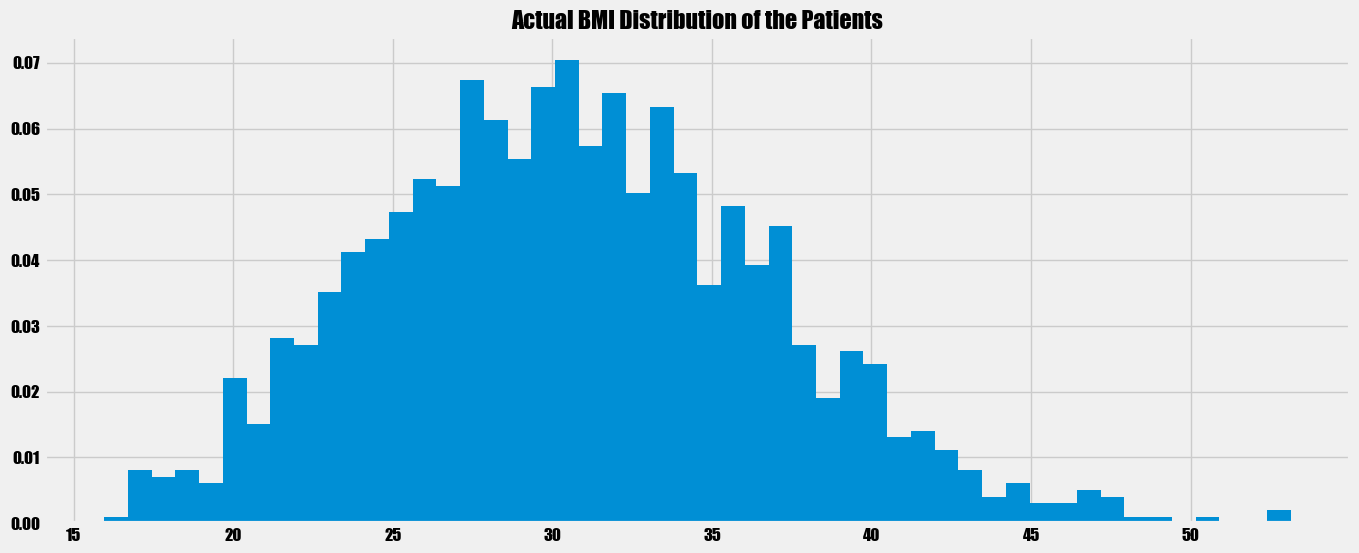

In [92]:
plt.hist(df['bmi'], bins=50, density=True)
plt.title('Actual BMI Distribution of the Patients')
plt.show()

<font color='blue'>***Normality Test-1***</font>

$H_{O}$: The BMI distribution is normal, $H_{A}$: The BMI districbution is not normal.

In [94]:
stats.shapiro(df['bmi'])

ShapiroResult(statistic=0.9938864621676107, pvalue=2.60468368798344e-05)

**As p-value is less than 0.05 so reject the null hypothesis, the BMI distribution is not normal. So we have to transform it to normal distribution.**

In [96]:
bmi=df[['bmi']].copy()
bmi_norm=bmi.apply(lambda x: stats.boxcox(x)[0])
stats.shapiro(bmi_norm)

ShapiroResult(statistic=0.998578462141708, pvalue=0.3477998142401526)

**Now p-value is above 0.05 so the BMI distribution has transformed into normal.**

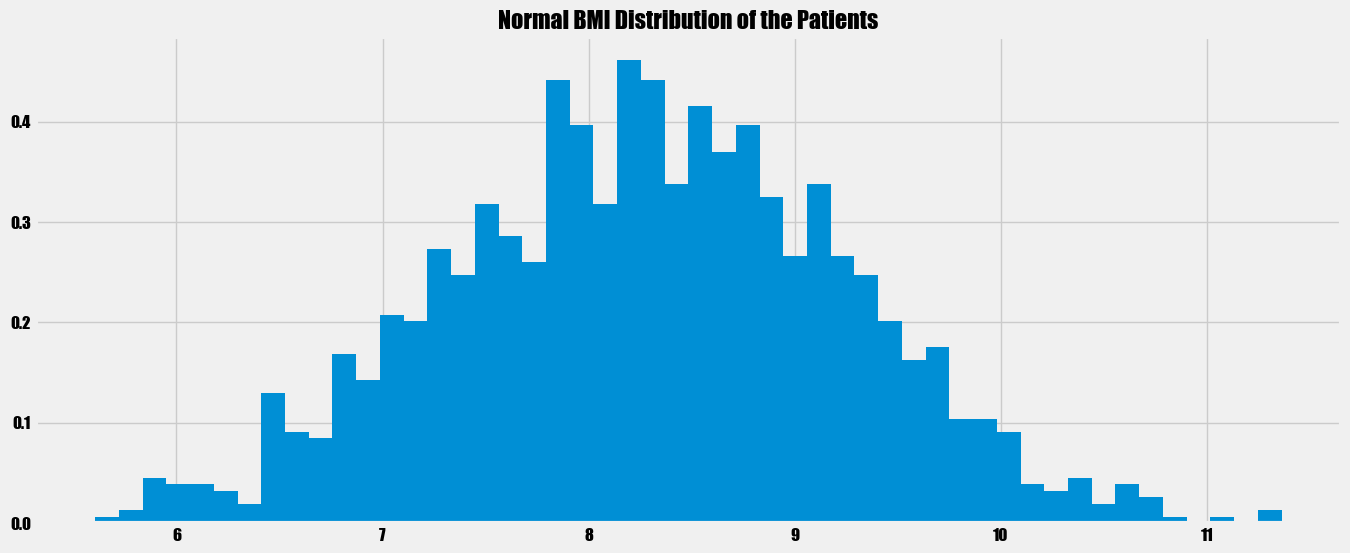

In [98]:
plt.hist(bmi_norm, bins=50, density=True)
plt.title('Normal BMI Distribution of the Patients')
plt.show()

In [99]:
mean_bmi, std_bmi=bmi_norm.mean(), bmi_norm.std()
print(f'Average and Standard Deviation of bmi for male and female are: {mean_bmi} and {std_bmi}')

Average and Standard Deviation of bmi for male and female are: bmi    8.282341
dtype: float64 and bmi    0.965002
dtype: float64


**Assuming we collect some BMI information of transgenders patients.**

In [101]:
transgender_data=np.round(np.random.uniform(17.8, 57.8, 200), 3)
transgender_data

array([39.542, 21.069, 36.132, 37.188, 24.431, 55.628, 51.799, 44.561,
       36.292, 34.271, 43.839, 39.617, 20.291, 38.3  , 50.056, 36.17 ,
       19.878, 49.251, 25.855, 28.145, 24.388, 31.009, 48.07 , 38.575,
       25.995, 52.913, 52.983, 52.623, 27.352, 35.85 , 57.2  , 48.68 ,
       18.887, 20.408, 36.357, 54.169, 39.348, 37.713, 22.019, 44.071,
       50.684, 33.017, 48.824, 56.379, 25.951, 38.733, 29.286, 49.514,
       40.904, 43.183, 49.717, 33.639, 54.404, 39.121, 24.118, 45.636,
       49.53 , 30.47 , 52.087, 54.046, 28.876, 57.141, 23.428, 25.881,
       25.169, 53.56 , 43.972, 23.884, 35.413, 42.412, 21.139, 53.097,
       49.944, 38.008, 56.485, 34.51 , 57.164, 44.517, 43.187, 24.438,
       53.077, 34.9  , 24.289, 18.304, 40.19 , 38.896, 46.574, 53.41 ,
       20.976, 47.06 , 25.296, 52.127, 50.563, 39.432, 46.21 , 30.374,
       36.647, 50.665, 36.171, 32.112, 37.568, 50.93 , 31.208, 24.75 ,
       46.281, 50.839, 21.825, 27.395, 23.479, 31.718, 35.814, 47.753,
      

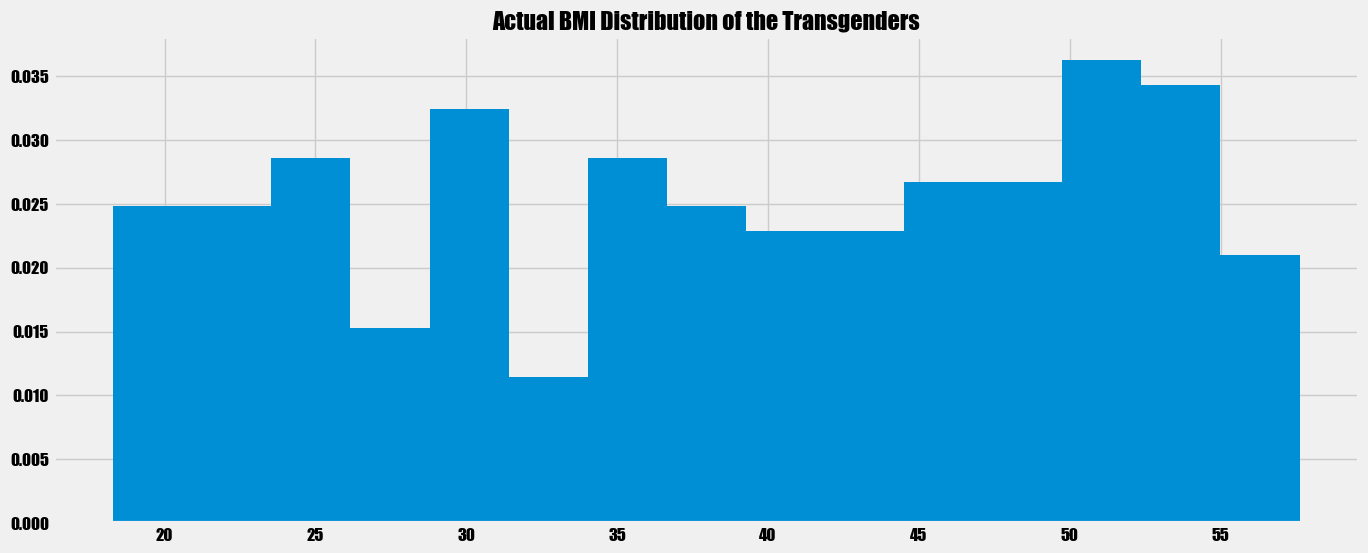

In [102]:
plt.hist(transgender_data, bins=15, density=True)
plt.title('Actual BMI Distribution of the Transgenders')
plt.show()

In [103]:
transgender_data_norm=stats.boxcox(transgender_data)

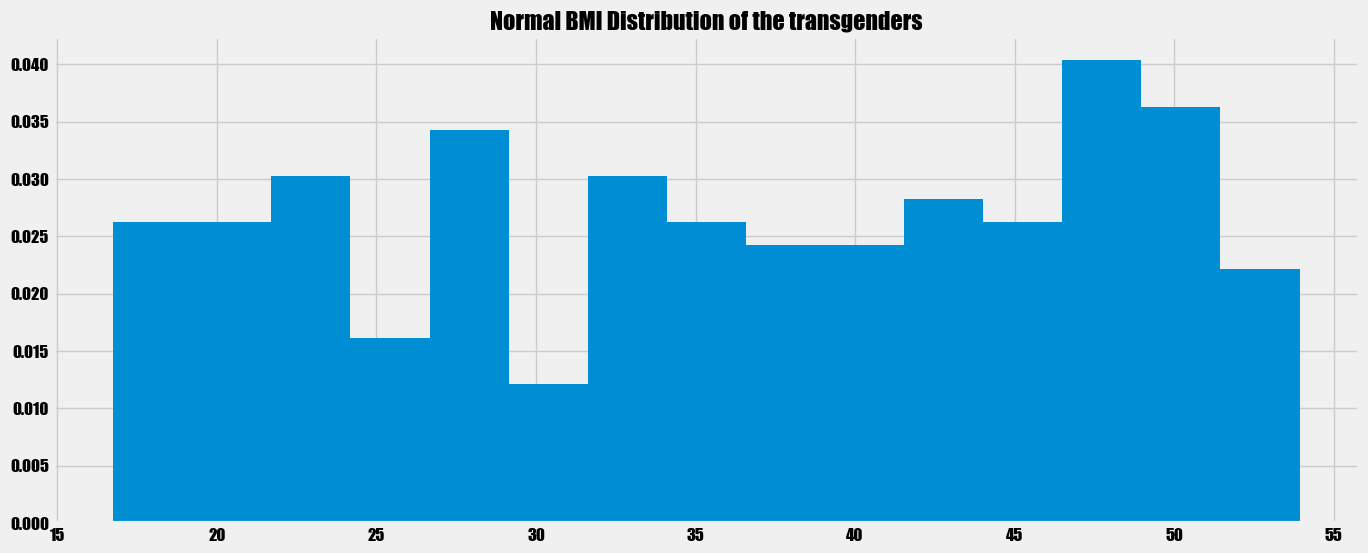

In [104]:
transgender_data_norm, _=transgender_data_norm
plt.hist(transgender_data_norm, bins=15, density=True)
plt.title('Normal BMI Distribution of the transgenders')
plt.show()

In [105]:
one_smaple_ztest(new_samples=transgender_data_norm, original_data=bmi_norm, target_measurement='New and original samples BMI', significance_level=0.05)

New and original samples BMI on Average are bmi    8.28
dtype: float64 and 36.13, repectively

Differences between them are: bmi    27.85
dtype: float64

T Statistics: bmi    35.85
dtype: float64, P-value: [0.]

Reject NULL HYPOTHESIS, the mean of New and original samples BMI are not independent of each other


**We have to reject our null hypothesis according to the T-test. There is a significant difference between the new datapoints of the transgenders and the male/female patients BMI.**

**Difference between them is 6.92 on average which gives enough evidence against the null hypothesis. So there is no type I error.**

### Two Sampled z-test

When comparing the means of two samples to see if it is likely that they represent the same population, researchers employ the Two-Sample Z-test.

<font color='blue'>***Test-15***</font>

*   $H_{O}$: There is no difference between the costs of the male and female patients (They are independent).
*   $H_{A}$: There is a significant difference between the costs of the male and female patients.

In [110]:
n=662
female_cost=df[df['sex'] == 'female']['charges'].sample(frac=1).to_frame()
male_cost=df[df['sex'] == 'male']['charges'].sample(n=n).to_frame()

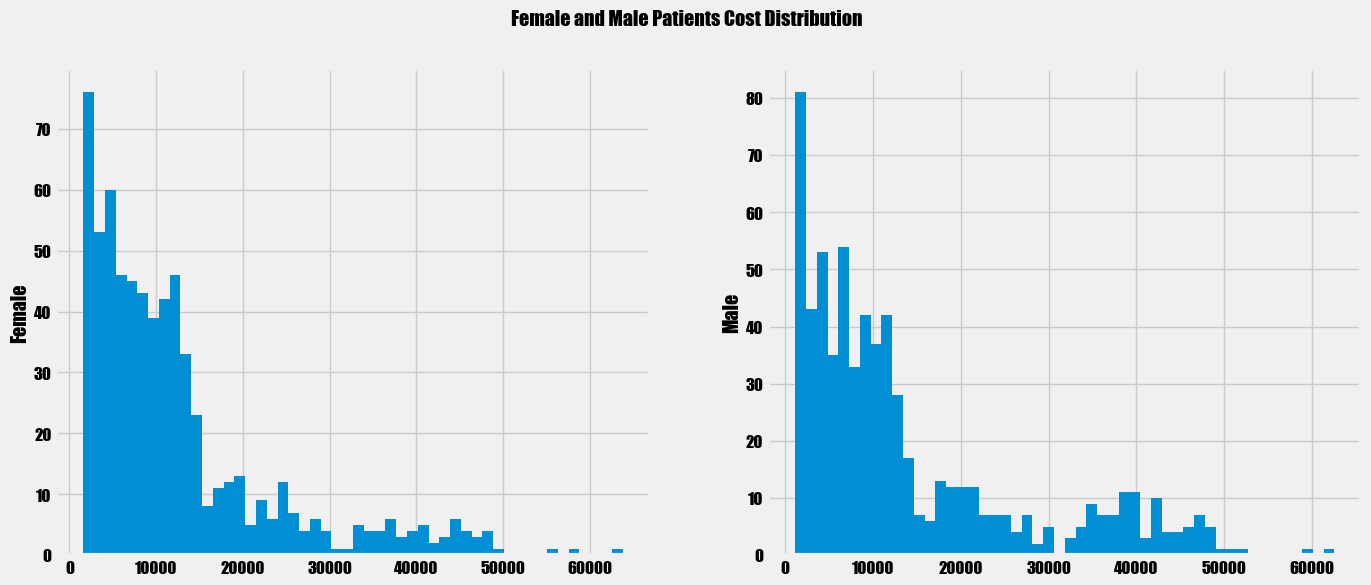

In [111]:
fig, (ax1, ax2)=plt.subplots(1, 2)
fig.suptitle('Female and Male Patients Cost Distribution')
ax1.hist(female_cost, bins=50)
ax1.set_ylabel('Female')
ax2.hist(male_cost, bins=50)
ax2.set_ylabel('Male')
plt.show()

<font color='blue'>***Normality Test-2***</font>

$H_{O}$: The cost distribution is normal for female or male patients, $H_{A}$: The cost distribution is not normal for female or male patients.

In [113]:
stats.shapiro(female_cost), stats.shapiro(male_cost)

(ShapiroResult(statistic=0.8053936070521875, pvalue=1.8303726201915285e-27),
 ShapiroResult(statistic=0.8239319010380743, pvalue=2.5210914196310197e-26))

**As p-value is less than 0.05 for both cases so reject the null hypothesis, the cost distribution is not normal for female or male patients.**

In [115]:
female_cost_norm=female_cost.apply(lambda x: stats.boxcox(x)[0])
stats.shapiro(female_cost_norm)

ShapiroResult(statistic=0.9851013996840257, pvalue=2.8111115386099944e-06)

In [116]:
male_cost_norm=male_cost.apply(lambda x: stats.boxcox(x)[0])
stats.shapiro(male_cost_norm)

ShapiroResult(statistic=0.9755913730118698, pvalue=4.688654849009544e-09)

**We cannot transform the cost to normal using boxcox method as p value is still below 0.05. We can try log transform**

In [118]:
female_cost_log=np.log(female_cost)
stats.shapiro(female_cost_log)

ShapiroResult(statistic=0.9851068081507668, pvalue=2.822917172992749e-06)

In [119]:
male_cost_log=np.log(male_cost)
stats.shapiro(male_cost_log)

ShapiroResult(statistic=0.9743265413215776, pvalue=2.2513152261672538e-09)

**Still reject the null hypothesis. But log transform gives better result than the boxcox in this case.**

In [121]:
two_smaple_ztest(group1=female_cost_log, group2=male_cost_log, target_measurement='Female and Male Patients Cost', significance_level=0.05)

Female and Male Patients Cost on Average are charges    9.09
dtype: float64 and charges    9.1
dtype: float64, repectively

Differences between them are: charges    0.01
dtype: float64

T Statistics: [-0.2], P-value: [0.84]

ACCEPT NULL HYPOTHESIS, the mean of Female and Male Patients Cost are independent of each other


**We can keep our null hypothesis according to the T-test. There is no relation between the costs of the male and female patients.**

**The actual difference is also 0.01 which is not as much as significant. So there is no type II error.**

## Anova Test

* A statistical test called an analysis of variance, or ANOVA, is used to compare the means of more than two groups.
* Also known as F-test.

Two types:
1. One way ANOVA
2. Two way ANOVA

**Maximum are hypotheses that have previously been tested. So far, no errors have been reported. Check to see if the ANOVA test produced any errors.**

### One-way ANOVA Test

A one-way ANOVA uses one independent variable.

<font color='blue'>***Test-16***</font>

*   $H_{O}$: There is no relationship between the gender and BMI (They are independent).
*   $H_{A}$: There is a significant relationship between the gender and BMI.

In [129]:
anova_test(dataset=df, independent_variable='sex', outcome_variable='bmi', )

ANOVA-TABLE for sex and bmi:


,sum_sq,df,F,PR(>F)
C(sex),106.912532,1.0,2.87897,0.089976
Residual,49613.287854,1336.0,NaN,NaN


**P-value is 0.089 which is >0.05 (significance level). So we can keep our null hypothesis. There is no meaningful effect of gender on BMI. It can also be seen from 'Test-10' that the female and male patrients BMI are independent to each other.**

<font color='blue'>***Test-17***</font>

*   $H_{O}$: There is no relationship between the smoking and BMI (They are independent).
*   $H_{A}$: There is a significant relationship between the smoking and BMI.

In [132]:
anova_test(dataset=df, independent_variable='smoker', outcome_variable='bmi')

ANOVA-TABLE for smoker and bmi:


,sum_sq,df,F,PR(>F)
C(smoker),0.699349,1.0,0.018792,0.890985
Residual,49719.501037,1336.0,NaN,NaN


**P-value is 0.89 which is >0.05 (significance level). So we can keep our null hypothesis. There is no meaningful effect of smoking on BMI. It can also be seen from 'Test-11' that the smoker and non-smoker patrients BMI are independent to each other.**

<font color='blue'>***Test-18***</font>

*   $H_{O}$: There is no relationship between the region and BMI (They are independent).
*   $H_{A}$: There is a significant relationship between the region and BMI.

In [135]:
anova_test(dataset=df, independent_variable='region', outcome_variable='bmi')

ANOVA-TABLE for region and bmi:


,sum_sq,df,F,PR(>F)
C(region),4055.880631,3.0,39.495057,1.881839e-24
Residual,45664.319755,1334.0,NaN,NaN


**The P-value is 1.88e-24, which is 0.05 (significance level). So we have to reject our null hypothesis. There is a significant effect of region on BMI. It can also be seen from Test-8 that there is an effect in 3 out of 4 regions except the Southwest region on the patient's BMI. Patients from the Southeast region have a higher BMI than the others.**

**The two-way Z-test is done by mixing up previously tested hypotheses.**

### Two-way ANOVA Test

A two-way ANOVA uses two independent variables.

<font color='blue'>***Test-19***</font>

* Mixing test-2, test-16 and test-18

In [141]:
anova_test(dataset=df, independent_variable='sex', outcome_variable='bmi', independent_variable_='region', two_way=True)

ANOVA-TABLE for (sex, region) and bmi:


,sum_sq,df,F,PR(>F)
C(sex),86.007035,1.0,2.519359,1.126940e-01
C(region),4034.975135,3.0,39.398134,2.163195e-24
C(sex):C(region),174.157808,3.0,1.700504,1.650655e-01
Residual,45404.154911,1330.0,NaN,NaN


* ***The gender p-value is equal to 1.12e-01***
* ***The region p-value is equal to 2.16e-24***
* ***The gender * region: p-value is equal to 1.65e-01***

**The p-values for three of the cases are less than 0.05. The two-way anova test implies that gender and region jointly have a significant effect on a patient's BMI. But previously, it was seen that gender has no effect on a patient's BMI, and that was actually true. So the two-way ANOVA has gone wrong for now, which leads to a type-I error. The third indicates a significant relationship between gender and region, which also leads to a type I error.**

<font color='blue'>***Test-20***</font>

* Mixing test-1, test-16 and test-17

In [144]:
anova_test(dataset=df, independent_variable='sex', outcome_variable='bmi', independent_variable_='smoker', two_way=True)

ANOVA-TABLE for (sex, smoker) and bmi:


,sum_sq,df,F,PR(>F)
C(sex),106.215552,1.0,2.864456,0.090790
C(smoker),0.002369,1.0,0.000064,0.993624
C(sex):C(smoker),147.849087,1.0,3.987242,0.046049
Residual,49465.436398,1334.0,NaN,NaN


* ***The gender p-value is equal to 0.09***
* ***The region p-value is equal to 0.99***
* ***The gender * smoker: p-value is equal to 0.04***

**The two-way ANOVA test implies that gender and smoking together have no significant effect on a patient's BMI. With "test-16" and "test-17," it returns the correct test results. It also shows that smoking and sex have a significant difference. According to test 1, male patients smoke 3% more than female patients. So there are no errors.**

<font color='blue'>***Test-21***</font>

* Mixing test-3, test-17 and test-18

In [147]:
anova_test(dataset=df, independent_variable='smoker', outcome_variable='bmi', independent_variable_='region', two_way=True)

ANOVA-TABLE for (smoker, region) and bmi:


,sum_sq,df,F,PR(>F)
C(smoker),8.973268,1.0,0.261646,6.090762e-01
C(region),4064.154550,3.0,39.501459,1.878444e-24
C(smoker):C(region),42.469983,3.0,0.412786,7.438464e-01
Residual,45612.876504,1330.0,NaN,NaN


* ***The smoker p-value is equal to 6.09e-01***
* ***The region p-value is equal to 1.87e-24***
* ***The smoker * region: p-value is equal to 7.43e-01***

**The p-values for three of the cases are less than 0.05. The two-way anova test implies that smoker and region jointly have a significant effect on a patient's BMI. But previously, it was seen that smoking has no effect on a patient's BMI, and that was actually true. So the two-way ANOVA has gone wrong for now, which leads to a type-I error. The third indicates a significant relationship between smoker and region, which also leads to a type I error.**

**We can see that when we mix "region" in the two-way anova test, it creates a bias in the result because it has a very small p-value. As a result, the two-way ANOVA gives type I errors.**

# Findings

<font color='red'>I applied the four most important hypothesis testing methods to US health insurance data. We can see from the above tests that there is an effect on BMI for the regions that the patients came from. However, the BMI is unaffected by gender, smoking status, age, or other factors. </font>